In [105]:
import pandas as pd
import numpy as np
import scipy
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [106]:
df= pd.read_csv("C:/Users/drbha/Downloads/project-files-music-genre-classification-with-pca (1)/music_dataset_mod.csv")

In [107]:
df.info()
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Tempo                        1000 non-null   float64
 1   Dynamics Range               1000 non-null   float64
 2   Vocal Presence               1000 non-null   float64
 3   Percussion Strength          1000 non-null   float64
 4   String Instrument Detection  1000 non-null   float64
 5   Electronic Element Presence  1000 non-null   float64
 6   Rhythm Complexity            1000 non-null   float64
 7   Drums Influence              1000 non-null   float64
 8   Distorted Guitar             1000 non-null   float64
 9   Metal Frequencies            1000 non-null   float64
 10  Ambient Sound Influence      1000 non-null   float64
 11  Instrumental Overlaps        1000 non-null   float64
 12  Genre                        890 non-null    object 
dtypes: float64(12), obj

In [108]:
missing_values= df.isnull().sum()
print(missing_values)

Tempo                            0
Dynamics Range                   0
Vocal Presence                   0
Percussion Strength              0
String Instrument Detection      0
Electronic Element Presence      0
Rhythm Complexity                0
Drums Influence                  0
Distorted Guitar                 0
Metal Frequencies                0
Ambient Sound Influence          0
Instrumental Overlaps            0
Genre                          110
dtype: int64


In [109]:
unique_genres= df['Genre'].unique()

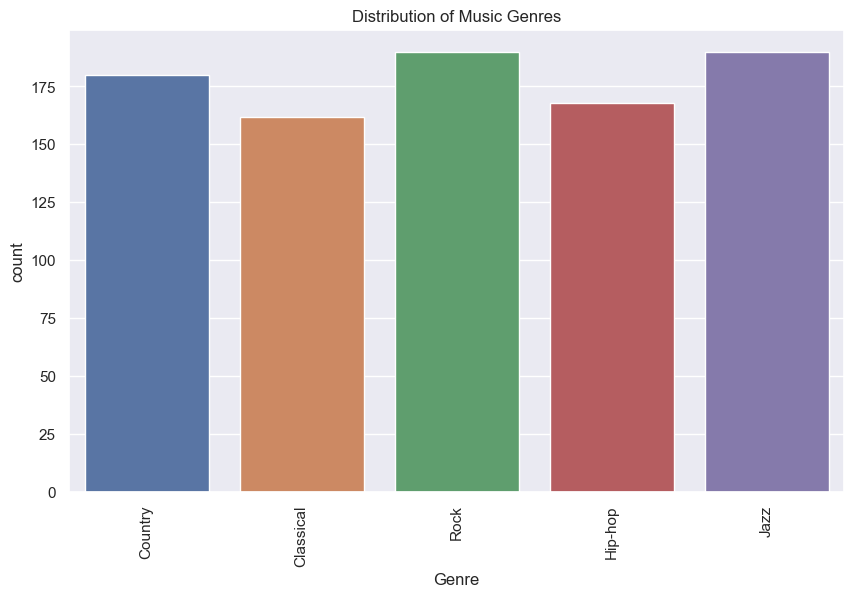

In [110]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Genre')
plt.xticks(rotation=90)
plt.title('Distribution of Music Genres')
plt.show()

In [111]:
df_cleaned = df.dropna(subset=['Genre'])

In [205]:
X = df_cleaned.drop(columns= ['Genre'])
y = df_cleaned['Genre']
y.unique()

array(['Country', 'Classical', 'Rock', 'Hip-hop', 'Jazz'], dtype=object)

In [113]:
label_encoder= LabelEncoder()
y_encoded= labelencoder.fit_transform(y)

In [114]:
df_encoded = X.copy()
df_encoded['Genre_encoded'] = y_encoded
df_encoded.columns

Index(['Tempo', 'Dynamics Range', 'Vocal Presence', 'Percussion Strength',
       'String Instrument Detection', 'Electronic Element Presence',
       'Rhythm Complexity', 'Drums Influence', 'Distorted Guitar',
       'Metal Frequencies', 'Ambient Sound Influence', 'Instrumental Overlaps',
       'Genre_encoded'],
      dtype='object')

In [115]:
corr_matrix = df_encoded.corr()
corr_matrix

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre_encoded
Tempo,1.000000,-0.019799,0.019506,0.041447,-0.074421,0.009629,0.018964,0.389400,0.040765,0.033752,0.039567,-0.038901,0.113906
Dynamics Range,-0.019799,1.000000,0.026418,-0.037116,0.127534,-0.204273,0.047814,-0.008319,-0.373529,-0.364005,-0.014778,0.015526,-0.462600
Vocal Presence,0.019506,0.026418,1.000000,0.012152,-0.056417,0.001731,0.041511,0.071056,0.005659,0.012855,0.041722,-0.053142,-0.005501
Percussion Strength,0.041447,-0.037116,0.012152,1.000000,-0.028638,-0.009360,-0.042843,0.524573,0.099178,0.089557,0.007340,0.024592,0.146171
String Instrument Detection,-0.074421,0.127534,-0.056417,-0.028638,1.000000,-0.106855,-0.091424,-0.076020,-0.133776,-0.136804,-0.018462,-0.003055,-0.185088
Electronic Element Presence,0.009629,-0.204273,0.001731,-0.009360,-0.106855,1.000000,0.060110,0.050346,0.211896,0.189693,0.044057,-0.045359,0.232907
Rhythm Complexity,0.018964,0.047814,0.041511,-0.042843,-0.091424,0.060110,1.000000,0.536786,0.030144,0.019255,0.003887,-0.000664,0.095718
Drums Influence,0.389400,-0.008319,0.071056,0.524573,-0.076020,0.050346,0.536786,1.000000,0.084165,0.067735,0.036744,-0.010554,0.169501
Distorted Guitar,0.040765,-0.373529,0.005659,0.099178,-0.133776,0.211896,0.030144,0.084165,1.000000,0.965909,0.012582,-0.057392,0.607291
Metal Frequencies,0.033752,-0.364005,0.012855,0.089557,-0.136804,0.189693,0.019255,0.067735,0.965909,1.000000,0.025294,-0.061390,0.582498


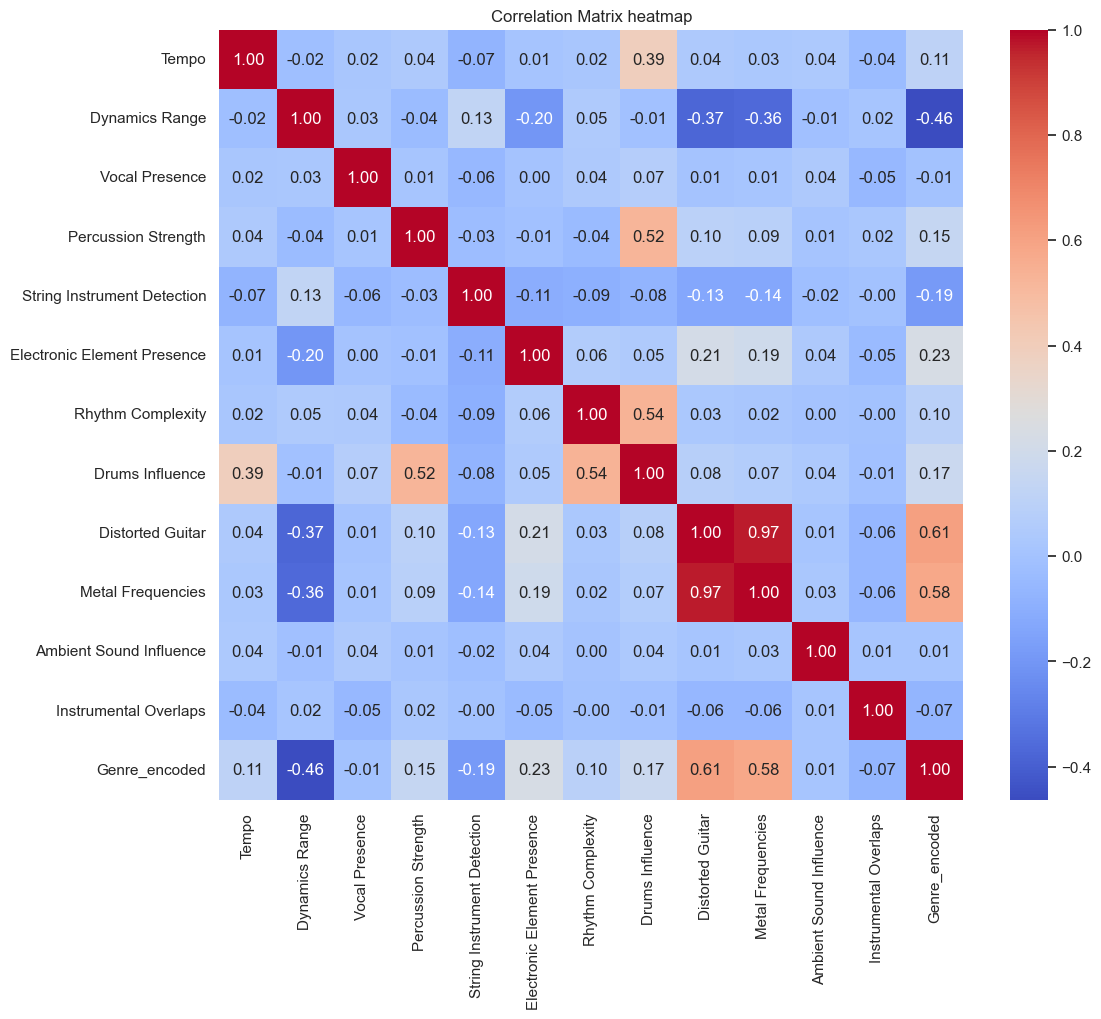

In [116]:
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot= True, cmap= 'coolwarm', fmt= '.2f')
plt.title('Correlation Matrix heatmap')
plt.show()

In [117]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_encoded)

In [119]:
pca= PCA()
X_pca = pca.fit_transform(X_scaled)
len(X_pca)

890

In [121]:
explained_variance_ratio = pca.explained_variance_ratio_

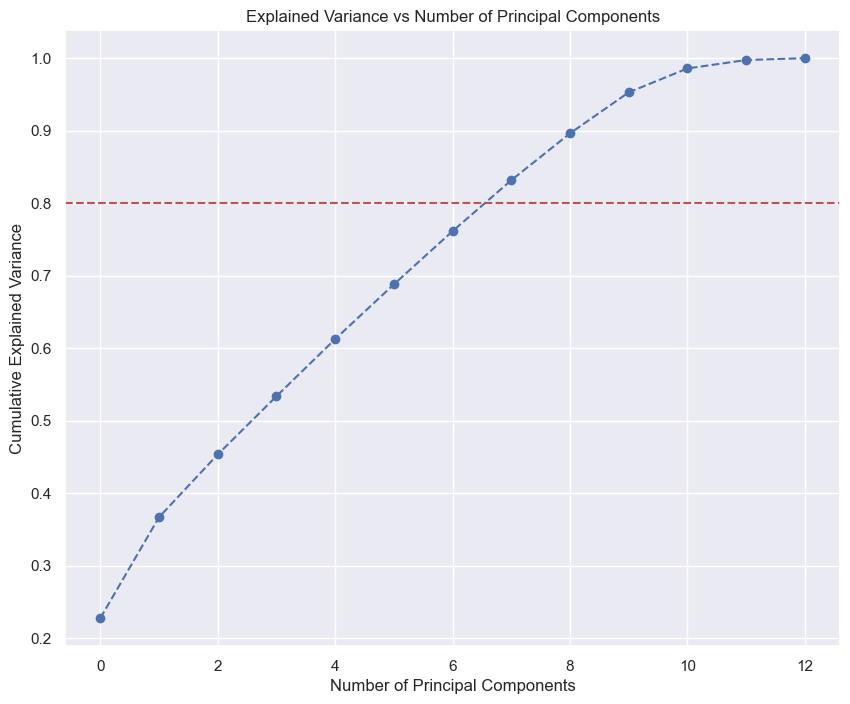

In [122]:
cumulative_variance = np.cumsum(explained_variance_ratio)
plt.figure(figsize=(10,8))
plt.plot(cumulative_variance, marker='o', linestyle= '--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs Number of Principal Components')
plt.grid(True)
plt.axhline(y=0.80, color='r', linestyle='--')
plt.show()

In [127]:
optimal_components = np.argmax(cumulative_variance >= 0.80)+1

In [217]:
pca_optimal= PCA(n_components = optimal_components)
pca_optimal

PCA(n_components=8)

In [168]:
X_pca_optimal = pca.fit_transform(X_scaled)
X_pca_optimal.shape

(890, 13)

In [169]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca_optimal, y_encoded, test_size= 0.3, random_state= 42)

In [170]:
log_reg_pca = LogisticRegression(max_iter= 10000)
log_reg_pca.fit(X_train_pca, y_train_pca)

LogisticRegression(max_iter=10000)

In [171]:
y_pred_pca = log_reg_pca.predict(X_test_pca)

In [172]:
accuracy_pca = accuracy_score(y_test_pca, y_pred_pca)
print(f"Accuracy with PCA : {accuracy_pca:.2f}" )

Accuracy with PCA : 0.99


In [173]:
report_pca = classification_report(y_test_pca, y_pred_pca)
print('Classification report (PCA):')
print(report_pca)

Classification report (PCA):
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        51
           1       1.00      0.96      0.98        52
           2       1.00      1.00      1.00        48
           3       1.00      0.98      0.99        62
           4       0.98      1.00      0.99        54

    accuracy                           0.99       267
   macro avg       0.99      0.99      0.99       267
weighted avg       0.99      0.99      0.99       267



In [137]:
X_train_orig,X_test_orig, y_train_orig, y_test_orig = train_test_split(X_scaled, y_encoded, test_size= 0.3, random_state= 42)

In [138]:
log_reg_orig = LogisticRegression(max_iter= 10000)

In [174]:
log_reg_orig.fit(X_train_orig, y_train_orig)

LogisticRegression(max_iter=10000)

In [175]:
y_pred_orig = log_reg_orig.predict(X_test_orig)

In [176]:
accuracy_orig= accuracy_score(y_test_orig, y_pred_orig)
print(f'Accuracy (Original): {accuracy: .2f}')

Accuracy (Original):  0.93


In [177]:
report_orig = classification_report(y_test_orig, y_pred_orig)
print("Classification report (Original):")
print(report_orig)

Classification report (Original):
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        51
           1       1.00      0.96      0.98        52
           2       1.00      1.00      1.00        48
           3       1.00      0.98      0.99        62
           4       0.98      1.00      0.99        54

    accuracy                           0.99       267
   macro avg       0.99      0.99      0.99       267
weighted avg       0.99      0.99      0.99       267



In [178]:
unknown_genre = df[df['Genre'].isnull()].copy()
unknown_genre.head()

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre
13,104.389822,65.826509,45.855410,55.655533,76.058845,55.625315,25.312585,59.202818,0.920308,0.000000,94.308889,27.441046,NaN
18,101.367152,47.843370,93.230347,67.101777,20.932163,50.772288,30.348312,62.950165,64.462755,68.971944,21.690071,94.717315,NaN
22,85.130539,55.707108,81.149615,21.473425,14.959208,61.017283,64.000152,43.332846,70.455879,79.053598,20.420619,99.499498,NaN
31,121.100952,71.769727,49.609529,82.539647,47.670106,119.460607,68.812707,83.727876,95.307620,95.779062,2.883916,19.230684,NaN
42,93.546825,44.563761,56.587554,99.546134,109.735122,30.128106,48.392807,81.888793,97.200948,100.000000,16.380240,55.483399,NaN


In [179]:
unknown_genre.loc[:,'Genre_encoded']= 0

In [180]:
X_unknown = unknown_genre.drop(columns= ['Genre'])

In [192]:
X_unknown_scaled = scaler.transform(X_unknown)
X_unknown_scaled.shape

(110, 13)

In [194]:
X_unknown_pca = pca.fit_transform(X_unknown_scaled)
X_unknown_pca.shape

(110, 13)

In [195]:
y_pred_unknown = log_reg_pca.predict(X_unknown_pca)

In [206]:
y = df_cleaned['Genre']

label_encoder= LabelEncoder()

In [207]:
label_encoder.fit(y)

LabelEncoder()

In [208]:
predicted_genres= label_encoder.inverse_transform(y_pred_unknown)

In [210]:
print("Predicted genres:", predicted_genres)
predicted_genres.shape

Predicted genres: ['Classical' 'Hip-hop' 'Jazz' 'Rock' 'Rock' 'Jazz' 'Hip-hop' 'Jazz' 'Jazz'
 'Jazz' 'Rock' 'Hip-hop' 'Rock' 'Rock' 'Hip-hop' 'Classical' 'Rock'
 'Hip-hop' 'Jazz' 'Jazz' 'Country' 'Rock' 'Country' 'Jazz' 'Jazz' 'Rock'
 'Country' 'Country' 'Classical' 'Rock' 'Classical' 'Classical' 'Rock'
 'Rock' 'Rock' 'Jazz' 'Hip-hop' 'Classical' 'Hip-hop' 'Hip-hop' 'Country'
 'Hip-hop' 'Hip-hop' 'Hip-hop' 'Hip-hop' 'Country' 'Hip-hop' 'Country'
 'Classical' 'Hip-hop' 'Hip-hop' 'Jazz' 'Country' 'Hip-hop' 'Rock'
 'Hip-hop' 'Country' 'Rock' 'Country' 'Hip-hop' 'Country' 'Hip-hop'
 'Classical' 'Hip-hop' 'Country' 'Rock' 'Jazz' 'Classical' 'Country'
 'Hip-hop' 'Jazz' 'Country' 'Country' 'Hip-hop' 'Classical' 'Jazz' 'Jazz'
 'Jazz' 'Country' 'Hip-hop' 'Jazz' 'Classical' 'Rock' 'Classical'
 'Classical' 'Rock' 'Classical' 'Country' 'Country' 'Country' 'Classical'
 'Rock' 'Hip-hop' 'Jazz' 'Rock' 'Rock' 'Country' 'Jazz' 'Classical' 'Jazz'
 'Country' 'Hip-hop' 'Jazz' 'Rock' 'Hip-hop' 'Country' 'R

(110,)

In [211]:
df['Genre']
missing_genre_indices = df[df['Genre'].isna()].index

In [212]:
print(f"Number of missing genres: {len(missing_genre_indices)}")
print(f"Number of predicted genres: {len(predicted_genres)}")

Number of missing genres: 110
Number of predicted genres: 110


In [213]:
if len(missing_genre_indices) == len(predicted_genres):
    # Assign predicted genre labels to the corresponding rows in the original DataFrame
    df.loc[missing_genre_indices, 'Genre'] = predicted_genres
    print(df['Genre'])
else:
    print("Mismatch in lengths: Cannot assign predicted genres.")

0        Country
1      Classical
2           Rock
3        Hip-hop
4        Country
         ...    
995    Classical
996    Classical
997         Rock
998         Rock
999         Jazz
Name: Genre, Length: 1000, dtype: object


In [214]:
# Check for any remaining missing values
missing_values_after = df['Genre'].isna().sum()
print(f"Missing values after assignment: {missing_values_after}")


Missing values after assignment: 0


In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Tempo                        1000 non-null   float64
 1   Dynamics Range               1000 non-null   float64
 2   Vocal Presence               1000 non-null   float64
 3   Percussion Strength          1000 non-null   float64
 4   String Instrument Detection  1000 non-null   float64
 5   Electronic Element Presence  1000 non-null   float64
 6   Rhythm Complexity            1000 non-null   float64
 7   Drums Influence              1000 non-null   float64
 8   Distorted Guitar             1000 non-null   float64
 9   Metal Frequencies            1000 non-null   float64
 10  Ambient Sound Influence      1000 non-null   float64
 11  Instrumental Overlaps        1000 non-null   float64
 12  Genre                        1000 non-null   object 
dtypes: float64(12), obj

In [216]:
df['Genre'].unique()

array(['Country', 'Classical', 'Rock', 'Hip-hop', 'Jazz'], dtype=object)

In [225]:
df.tail(10)

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre
990,145.665597,28.642070,52.657254,7.204516,94.165273,7.130571,78.159682,73.616978,94.777354,93.121865,46.236654,77.689609,Hip-hop
991,130.719110,65.990957,21.775950,91.817048,34.029452,105.525736,28.552899,99.587397,1.414556,0.000000,59.447447,74.901837,Country
992,117.892313,35.001524,76.506358,77.972570,80.765657,13.759213,59.985923,80.108786,93.831262,100.000000,15.851851,47.984445,Rock
993,104.315096,26.173723,3.334345,42.132602,38.434513,66.522798,62.051560,79.475348,61.390214,52.925363,50.383816,52.630256,Jazz
994,121.863373,50.872678,70.100162,106.212013,66.573813,89.927526,3.009635,79.634816,15.398297,31.235519,11.997421,57.281283,Country
995,66.578839,54.533872,99.782246,95.633310,91.414514,19.396142,36.280860,78.298955,4.890606,4.638077,75.479656,95.990077,Classical
996,126.570862,57.812829,90.809940,64.880583,40.437517,38.051344,66.204244,95.770959,1.745673,6.729019,82.042218,43.590027,Classical
997,121.731543,51.385204,33.849400,17.044544,84.483481,13.312790,8.953013,64.068960,90.738580,96.043437,5.499350,74.604889,Rock
998,97.070804,19.210429,62.662860,22.720453,66.917937,80.590809,51.403310,50.828636,68.518232,55.119045,21.781372,24.716517,Rock
999,71.050781,32.967250,62.875776,78.868747,88.094454,59.148014,83.420324,59.582109,37.329193,44.576693,87.458414,78.270683,Jazz


In [226]:
df.head()

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre
0,114.618354,57.976367,53.251766,99.061840,14.686768,17.628630,46.545522,75.839434,79.378892,71.753088,96.439665,53.771763,Country
1,116.672803,69.387087,95.787280,90.831033,47.280419,-15.618194,85.421085,100.455908,0.713015,0.000000,17.327295,15.017146,Classical
2,128.328121,52.930677,65.701187,104.439247,5.984994,50.467388,18.006722,77.642913,80.652946,87.692110,95.125207,25.308020,Rock
3,128.511337,25.494755,14.095374,40.106130,47.715584,87.335201,68.603329,63.536557,74.888346,76.239108,97.016998,96.893109,Hip-hop
4,135.474190,45.174876,101.469872,70.002203,108.177637,25.865590,31.295163,81.121030,36.178193,23.381542,53.753793,30.142986,Country
